In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("C:/Users/admin/OneDrive/Temp/Weight-height.xlsx")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


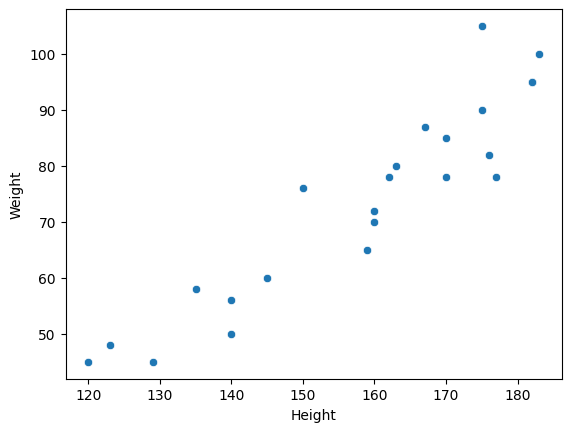

In [3]:
sns.scatterplot(x='Height', y='Weight', data=df)
plt.show()

In [4]:
print(df.corr())

          Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000


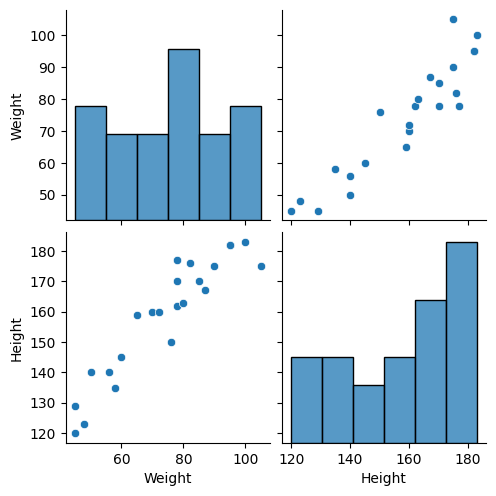

In [5]:
sns.pairplot(df)

In [6]:
# Independent and dependent variables
X = df[['Weight']]
Y = df['Height']

In [7]:
print(X.shape)
print(Y.shape)

(23, 1)
(23,)


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [10]:
print(X_train)
print(X_train.shape)

    Weight
1       58
13     100
5       78
2       48
11      95
20      45
3       60
4       70
18      76
16      50
21      56
22      72
7       90
10      82
14      85
19      87
6       80
(17, 1)


In [11]:
X_test.shape

(6, 1)

In [12]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)	
X_test = scaler.transform(X_test)

In [14]:
print(X_train, X_test)

[[-0.87662801]
 [ 1.66773133]
 [ 0.33497168]
 [-1.48242785]
 [ 1.36483141]
 [-1.6641678 ]
 [-0.75546804]
 [-0.1496682 ]
 [ 0.21381171]
 [-1.36126788]
 [-0.99778797]
 [-0.02850823]
 [ 1.06193149]
 [ 0.57729161]
 [ 0.75903157]
 [ 0.88019153]
 [ 0.45613165]] [[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


In [15]:
# applying linear regression
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression(fit_intercept=True)

In [17]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
print("Slope : " , model.coef_)
print("Intercept : " , model.intercept_)
# y = mx + b
# m = model.coef_
# b = model.intercept_ 
# h(x) = Bo + B1*x1 

Slope :  [17.2982057]
Intercept :  156.47058823529412


In [19]:
print(X_test)

[[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


In [20]:
x_predict = model.predict(X_test)

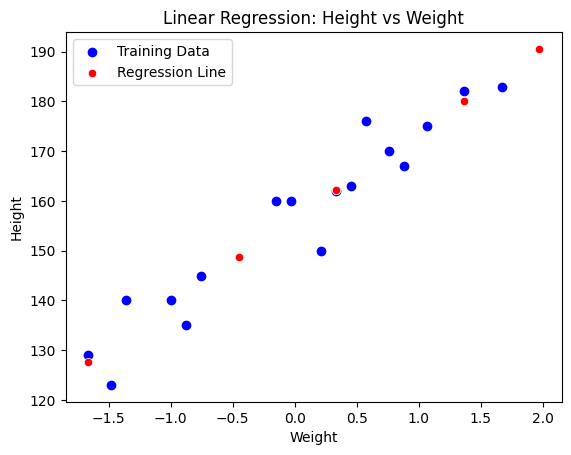

In [21]:
# Plotting the regression line
plt.scatter(X_train, y_train, color='blue', label='Training Data')
sns.scatterplot(x=X_test.flatten(), y=x_predict, color='red', label='Regression Line')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Linear Regression: Height vs Weight')
plt.legend()	
plt.show()

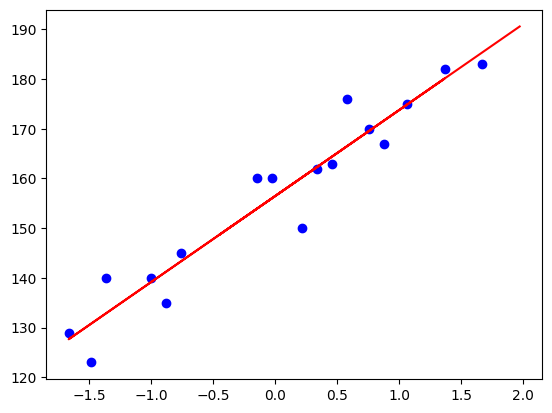

In [22]:
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_test, x_predict, color='red', label='Regression Line')
plt.show()

In [23]:
# messuring the accuracy of the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
mse = mean_squared_error(y_test, x_predict)
mae = mean_absolute_error(y_test, x_predict)	
rmse = np.sqrt(mse)
r2 = r2_score(y_test, x_predict)

In [25]:
print("MSE : ", mse)
print("MAE : ", mae)
print("RMSE : ", rmse)
print("R2 : ", r2)

MSE :  114.84069295228699
MAE :  9.66512588679501
RMSE :  10.716374991212605
R2 :  0.7360826717981276


In [26]:
# model.predict([[72]]) -> 1401
# Standardizing the input before prediction
model.predict(scaler.transform([[72]]))  # Predicting the height for a weight of 72 kg

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])